# Exploratory Data Analysis

## Preparing environment

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../high_performance_employee_resign_prediction')
from utils import paths

In [52]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Personalizing plots

In [53]:
%matplotlib inline

sns.set_theme(
    style="whitegrid",
    rc = {"figure.figsize": (6, 6)},
    context='notebook'
    )

## Importing data

In [54]:
train_clean_df = pd.read_csv(paths.data_interim_dir('train_clean.csv'))
test_clean_df = pd.read_csv(paths.data_interim_dir('test_clean.csv'))

In [55]:
train_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_employee_employee          2152 non-null   int64  
 1   id_last_boss_employee         2152 non-null   int64  
 2   seniority_employee            2152 non-null   int64  
 3   work_modality_employee        2152 non-null   object 
 4   office_distance_employee      2152 non-null   float64
 5   low_health_days_employee      2152 non-null   int64  
 6   gender_employee               2152 non-null   object 
 7   recruitment_channel_employee  2152 non-null   object 
 8   average_permanence_employee   2152 non-null   int64  
 9   salary_employee               2152 non-null   int64  
 10  performance_score_employee    2152 non-null   float64
 11  psi_score_employee            2152 non-null   int64  
 12  marital_estatus_employee      2152 non-null   object 
 13  joi

In [56]:
train_clean_df.describe()

id_employee_employee  id_last_boss_employee  seniority_employee  \
count           2152.000000            2152.000000         2152.000000   
mean          102070.160781          102090.369424            1.042286   
std             1210.999342              43.775341            0.201288   
min           100001.000000          102000.000000            1.000000   
25%           101028.750000          102054.000000            1.000000   
50%           102048.500000          102090.500000            1.000000   
75%           103135.500000          102127.000000            1.000000   
max           104171.000000          102172.000000            2.000000   

       office_distance_employee  low_health_days_employee  \
count               2152.000000               2152.000000   
mean                   3.111768                  2.709108   
std                    1.789050                  2.982975   
min                    0.120000                  0.000000   
25%                    1.818750                  1.000000   
50%                    2.510000                  2.000000   
75%                    4.151250                  3.000000   
max                   21.050000                 35.000000   

       average_permanence_employee  salary_employee  \
count                  2152.000000     2.152000e+03   
mean                      6.644981     4.570211e+05   
std                       4.283794     3.029435e+05   
min                       1.000000     7.652100e+04   
25%                       3.000000     2.604398e+05   
50%                       6.000000     3.734225e+05   
75%                       9.000000     6.741930e+05   
max                      25.000000     1.900000e+06   

       performance_score_employee  psi_score_employee  join_age_employee  ...  \
count                 2152.000000         2152.000000        2152.000000  ...   
mean                    63.994424           75.286245          34.981413  ...   
std                     22.925485            6.050987          11.101393  ...   
min                      5.000000           58.000000           9.000000  ...   
25%                     43.000000           71.000000          27.000000  ...   
50%                     67.000000           75.000000          36.000000  ...   
75%                     89.000000           79.000000          44.000000  ...   
max                     99.000000           98.000000          65.000000  ...   

       join_year_boss  join_month_boss  office_distance_diff  \
count     2152.000000      2152.000000           2152.000000   
mean      2017.769052         6.475372             -0.104923   
std          3.478447         3.498468              2.487646   
min       2012.000000         1.000000            -18.980000   
25%       2015.000000         3.000000             -1.460000   
50%       2018.000000         6.000000             -0.040000   
75%       2021.000000        10.000000              1.261250   
max       2023.000000        12.000000              6.310000   

       low_health_days_diff  average_permanence_diff   salary_diff  \
count           2152.000000              2152.000000  2.152000e+03   
mean              -0.881970                 1.632435  9.022575e+05   
std                3.788334                 6.714690  4.917812e+05   
min              -35.000000               -20.000000 -1.210565e+06   
25%               -2.000000                -3.000000  6.224485e+05   
50%               -1.000000                 1.000000  9.754715e+05   
75%                1.000000                 6.000000  1.309581e+06   
max               17.000000                25.000000  1.732943e+06   

       join_days_diff  joined_after_boss     age_diff       resign  
count     2152.000000        2152.000000  2152.000000  2152.000000  
mean        80.184015           0.474907     5.189591     0.466078  
std       1784.648770           0.499486    16.460886     0.498964  
min      -4316.000000           0.000000   -40.000000     0.000000  
25%      -1

## Exploring variables

### Objective variable: resign

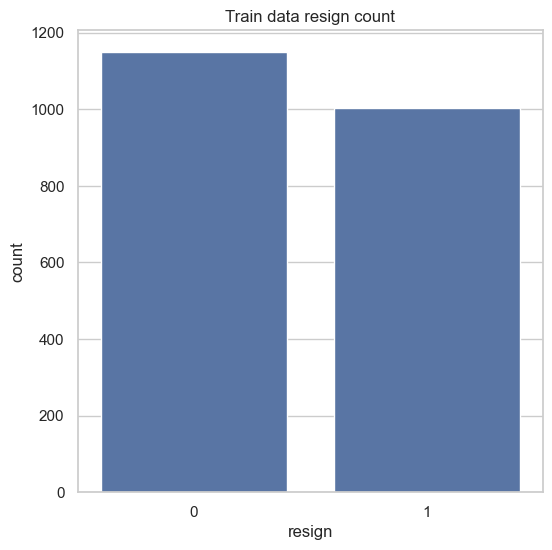

In [57]:
# Plot resign in train data

sns.countplot(data=train_clean_df, x='resign')
plt.title('Train data resign count')

plt.show()

### Categorical columns

In [58]:
cat_cols = train_clean_df.select_dtypes(include='object').columns.tolist()
cat_cols.append('seniority_employee')
cat_cols.append('joined_after_boss')
cat_cols.append('join_month_employee')
cat_cols.append('join_year_employee')
cat_cols.append('join_month_boss')
cat_cols.append('join_year_boss')

In [59]:
train_clean_df[cat_cols] = train_clean_df[cat_cols].astype('category')
test_clean_df[cat_cols] = test_clean_df[cat_cols].astype('category')

In [60]:
train_clean_df['resign'] = train_clean_df['resign'].astype('category')

In [61]:
def plotting_categories(df: pd.DataFrame, cat_cols: list, hue=None, name_df = 'Train data'):
    """
    Plot count and proportion distribution of categorical columns in a DataFrame.

    This function generates subplots for each categorical column specified in `cat_cols`.
    Depending on the presence of `hue`, it either plots two subplots (countplot and proportion histogram)
    for each column when `hue` is specified, or just a countplot when `hue` is not specified.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data to be plotted.
    cat_cols (list): List of column names (strings) containing categorical data to be plotted.
    hue (str, optional): Optional categorical variable for grouping/counting.
    name_df (str, optional): Name of the DataFrame for labeling plots (default is 'Train data').

    Returns:
    None: This function directly plots the graphs using Matplotlib and Seaborn.

    Example:
    >>> import pandas as pd
    >>> import seaborn as sns
    >>> import matplotlib.pyplot as plt
    >>> data = {'category': ['A', 'B', 'A', 'C', 'B', 'A'], 'value': [1, 2, 3, 1, 2, 3]}
    >>> df = pd.DataFrame(data)
    >>> plotting_categories(df, ['category'])
    """
    if hue:
        fig, axs = plt.subplots(len(cat_cols), 2, figsize=(12, 6*len(cat_cols)))
        for i, col in enumerate(cat_cols):
            sns.countplot(data=df, x=col, hue=hue, ax=axs[i, 0])
            sns.histplot(data=df, x=col, hue=hue, multiple='fill', stat='proportion', shrink=.8, ax=axs[i, 1])

            axs[i, 0].set_title(f'{name_df} {col} count by {hue}')
            axs[i, 1].set_title(f'{name_df} {col} proportion by {hue}')


    else:
        fig, axs = plt.subplots(len(cat_cols), 1, figsize=(6, 6*len(cat_cols)))
        for i, col in enumerate(cat_cols):
            sns.countplot(data=df, x=col, ax=axs[i])
            axs[i].set_title(f'{name_df} {col} count')
    
    plt.tight_layout()

In [62]:
# Plot category on train data (except id_last_boss due to category quantity)

plotting_categories(train_clean_df, cat_cols, hue='resign')

plt.show()

Analizing plots, there are some observations:

- Employees with people in charge are widely more likely to resign the first 6 months; maybe their work load is much higher.
- Hybrid work modality employees are sightly more likely to resign the first 6 months, this will be tested with hypothesis testing.
- There are no great differences between gender on resign the first 6 months, but women are sightly more likely to resign. This will be tested with hypothesis testing.
- Employees recruited by LinkedIn and Portal Web are significantly more likely to resign the first 6 months than recruited by other methods. It's important to ensure that work conditions and remuneration are well defined on those methods to avoid a bad experience for new employees. This will be tested with hypothesis testing.
- Divorced and single employees are more likely to resign on the first 6 months. This will be tested with hypothesis testing.
- Employees are sightly more likely to resign on the second semester of the year, specially those that were recruited on july and august. This can be a signal that work load increases significantly on those dates and employees look to resign. This will be tested with hypothesis testing.
- Low performance employees are widely more likely to resign.
- People that joined the latests years from 2019 are more likely to resign
- Boss work modality don't seems to have effects on resign. This will be tested with hypothesis testing
- People with woman boss are sightly more likely to resign
- People with boss recruited by headhunter are sightly more likely to resign. Will be tested with hypothesis testing.
- There are differences in resign in the year that boss joined
- Most of the bosses have low performance, and people who have low performance bosses are sightly more likely to resign
- join_month and join_year for both employee and boss will be tested with hypothesis testing to determine if they have influence over the resign

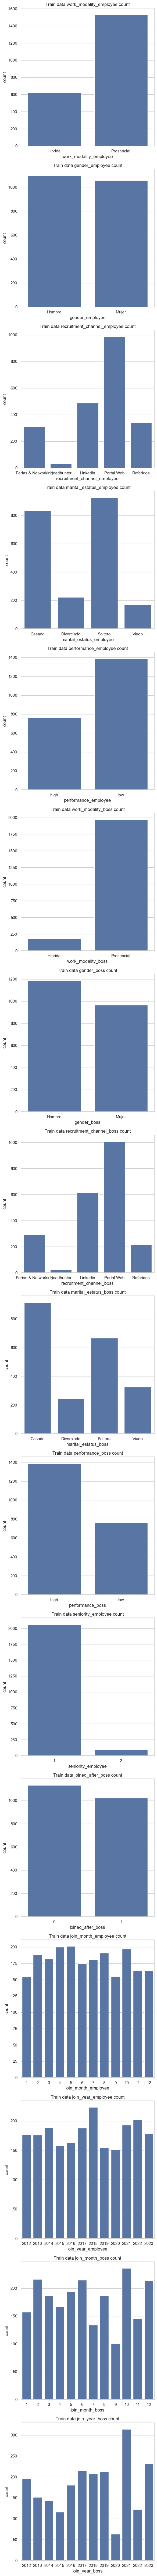

In [64]:
plotting_categories(train_clean_df, cat_cols)

plt.show()

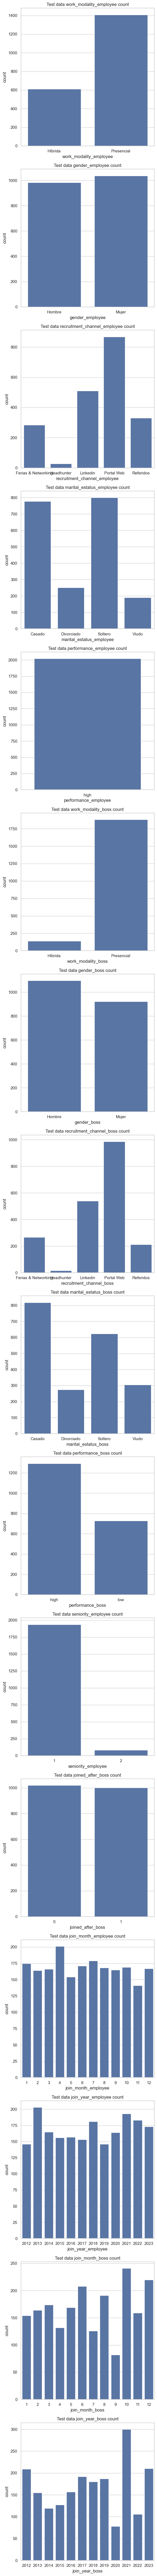

In [65]:
plotting_categories(test_clean_df, cat_cols, name_df='Test data')

plt.show()

# Exploring bosses with the most higher employee resign proportion

In [ ]:
# Counting exployees who resign by boss

boss_resign_count = train_clean_df.groupby('id_ultimo_jefe')['abandono_6meses'].value_counts().unstack().sort_values(by=1, ascending=False)
boss_resign_count

abandono_6meses   0   1
id_ultimo_jefe         
unknown          20  71
102172.0         14  19
102120.0          6  15
102171.0         16  15
102138.0          7  15
...              ..  ..
102148.0          2   0
102160.0          6   0
102023.0         12   0
102020.0          6   0
102000.0          1   0

[172 rows x 2 columns]

In [ ]:
# Calculating proportion of employees who resing by boss

boss_resign_proportion = train_clean_df.groupby('id_ultimo_jefe')['abandono_6meses'].value_counts(normalize=True).unstack().sort_values(by=1, ascending=False)
boss_resign_proportion

abandono_6meses         0         1
id_ultimo_jefe                     
102166.0         0.000000  1.000000
102167.0         0.000000  1.000000
102125.0         0.153846  0.846154
102127.0         0.187500  0.812500
unknown          0.219780  0.780220
...                   ...       ...
102164.0         1.000000  0.000000
102163.0         1.000000  0.000000
102160.0         1.000000  0.000000
102001.0         1.000000  0.000000
102000.0         1.000000  0.000000

[172 rows x 2 columns]

In [ ]:
# Joining both tables

joined_boss = boss_resign_proportion.merge(boss_resign_count, on='id_ultimo_jefe', how='inner')
joined_boss['total_employees'] = joined_boss['0_y'] + joined_boss['1_y']
joined_boss = joined_boss.sort_values(by=['1_x', 'total_employees'], ascending=[False, False])
joined_boss

abandono_6meses       0_x       1_x  0_y  1_y  total_employees
id_ultimo_jefe                                                
102166.0         0.000000  1.000000    0    2                2
102167.0         0.000000  1.000000    0    1                1
102125.0         0.153846  0.846154    2   11               13
102127.0         0.187500  0.812500    3   13               16
unknown          0.219780  0.780220   20   71               91
...                   ...       ...  ...  ...              ...
102004.0         1.000000  0.000000    1    0                1
102003.0         1.000000  0.000000    1    0                1
102164.0         1.000000  0.000000    1    0                1
102163.0         1.000000  0.000000    1    0                1
102000.0         1.000000  0.000000    1    0                1

[172 rows x 5 columns]

In [ ]:
joined_boss.head(20)

abandono_6meses       0_x       1_x  0_y  1_y  total_employees
id_ultimo_jefe                                                
102166.0         0.000000  1.000000    0    2                2
102167.0         0.000000  1.000000    0    1                1
102125.0         0.153846  0.846154    2   11               13
102127.0         0.187500  0.812500    3   13               16
unknown          0.219780  0.780220   20   71               91
102158.0         0.222222  0.777778    2    7                9
102062.0         0.222222  0.777778    2    7                9
102013.0         0.250000  0.750000    2    6                8
102093.0         0.266667  0.733333    4   11               15
102120.0         0.285714  0.714286    6   15               21
102136.0         0.285714  0.714286    4   10               14
102016.0         0.300000  0.700000    3    7               10
102155.0         0.300000  0.700000    3    7               10
102046.0         0.307692  0.692308    4    9               13
102113.0         0.315789  0.684211    6   13               19
102138.0         0.318182  0.681818    7   15               22
102043.0         0.333333  0.666667    7   14               21
102054.0         0.333333  0.666667    6   12               18
102063.0         0.333333  0.666667    4    8               12
102079.0         0.333333  0.666667    4    8               12

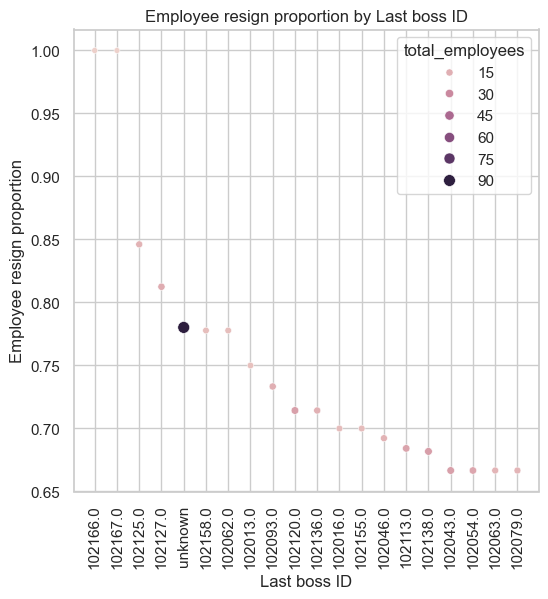

In [ ]:
# Plotting the bosses with the highest proportion of employees resign

sns.scatterplot(data=joined_boss.head(20), x='id_ultimo_jefe', y='1_x', size='total_employees', hue='total_employees')
plt.xlabel('Last boss ID')
plt.ylabel('Employee resign proportion')
plt.title('Employee resign proportion by Last boss ID')
plt.xticks(rotation=90)
plt.show()

As we can see from the plot and the table, `id_ultimo_jefe` could have great influence in the resign, which means that some people are more likely to resign if they have certain bosses. In the business context, it is important to check the reasons from each boss and apply corrective actions in order to reduce people resign.

## Exploring numerical columns

In [ ]:
num_cols = ['distancia_oficina', 'dias_baja_salud', 'permanencia_promedio', 'salario', 'performance_score', 'psi_score', 'age']

In [ ]:
def explore_numerical_dist(df: pd.DataFrame, cols: list, hue=None, name_df='Train data'):
    """
    Visualize the distribution of numerical columns in a DataFrame using histograms and boxplots.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    cols (list): List of numerical columns to visualize.
    hue (str, optional): Column name to use for color coding in the plots. Defaults to None.
    df_name (str, optional): Name of the DataFrame to include in plot titles. Defaults to 'Train data'.

    Returns:
    None: The function creates and displays the plots.

    """
    
    fig, axs = plt.subplots(len(cols), 2, figsize=(12, 6*len(cols)))

    if hue:
        for i, col in enumerate(cols):
            sns.histplot(data=df, x=col, hue=hue, ax=axs[i, 0], kde=True)
            sns.boxplot(data=df, x=col, hue=hue, ax=axs[i, 1])

            axs[i, 0].set_title(f'{name_df} {col} histogram by {hue}')
            axs[i, 1].set_title(f'{name_df} {col} boxplot by {hue}')

    else:
        for i, col in enumerate(cols):
            sns.histplot(data=df, x=col, ax=axs[i, 0], kde=True)
            sns.boxplot(data=df, x=col, ax=axs[i, 1])

            axs[i, 0].set_title(f'{name_df} {col} histogram')
            axs[i, 1].set_title(f'{name_df} {col} boxplot')
    
    plt.tight_layout()

In [ ]:
explore_numerical_dist(train_clean_df, num_cols, hue='abandono_6meses')

plt.show()

In general, distribution for both employees who resigned and those who don't are similar, except for performance_score, where people with lower performance score are sightly more likely to resing.

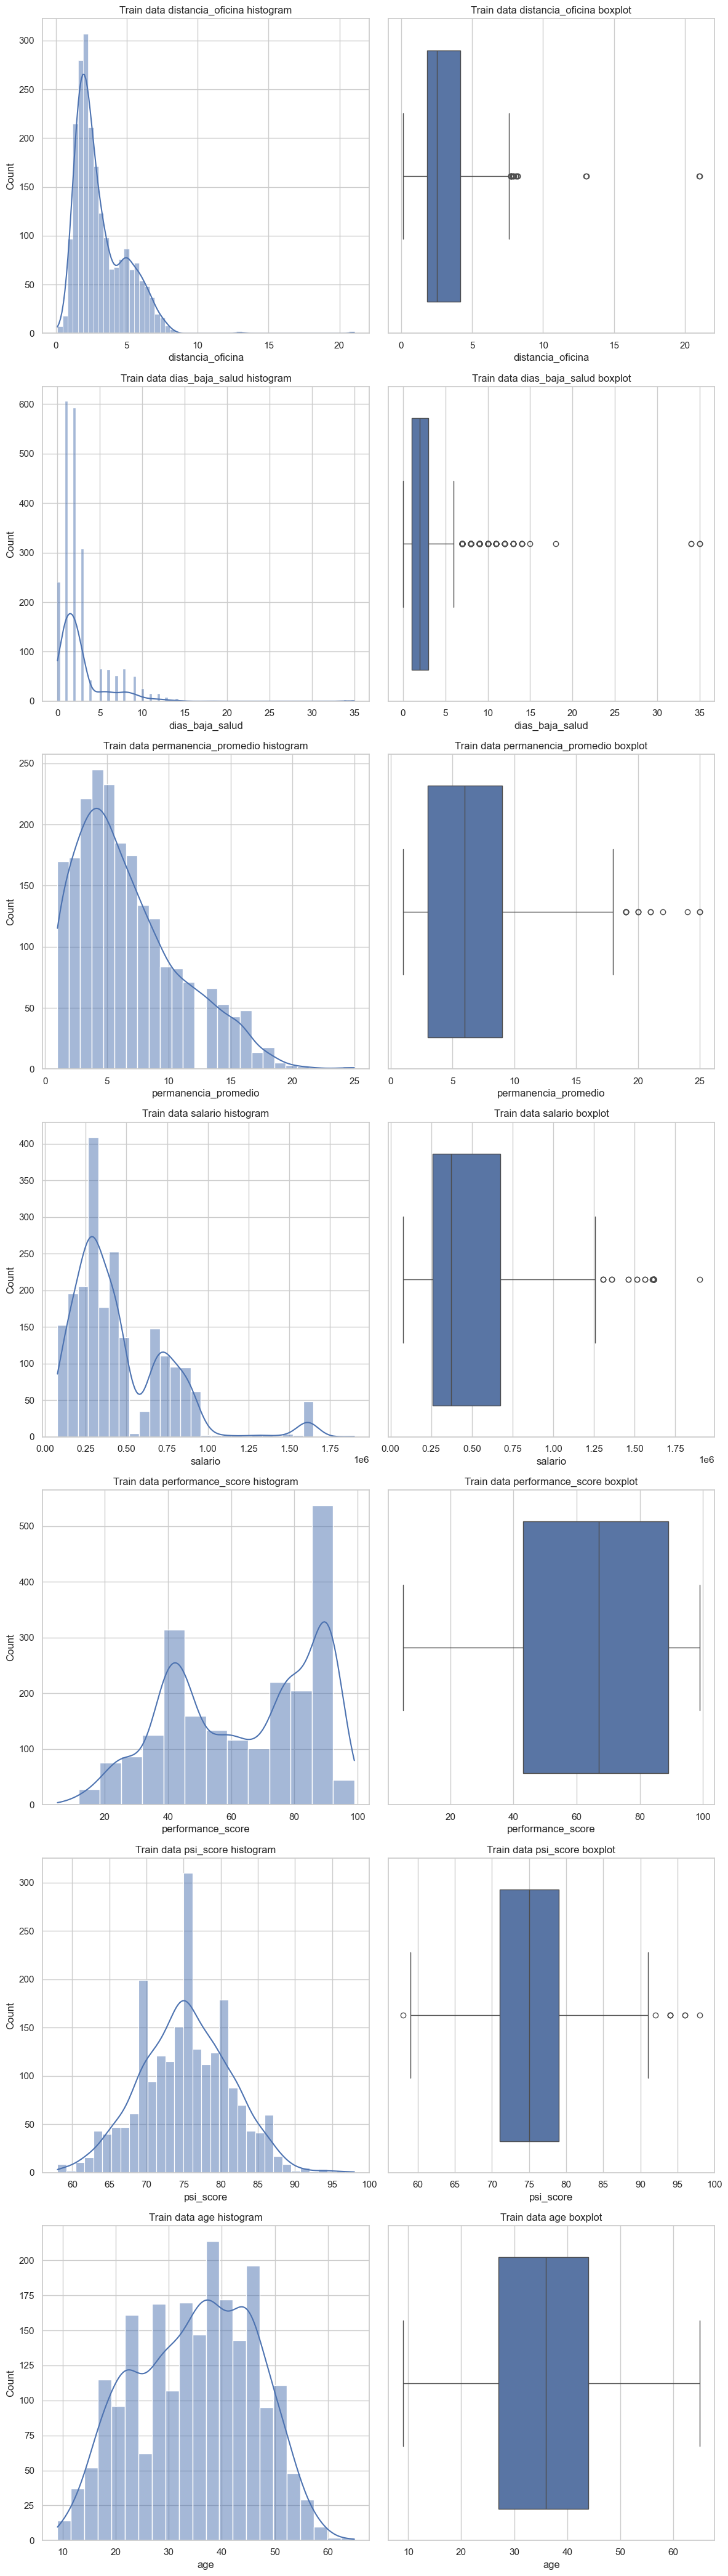

In [ ]:
explore_numerical_dist(train_clean_df, num_cols)

plt.show()

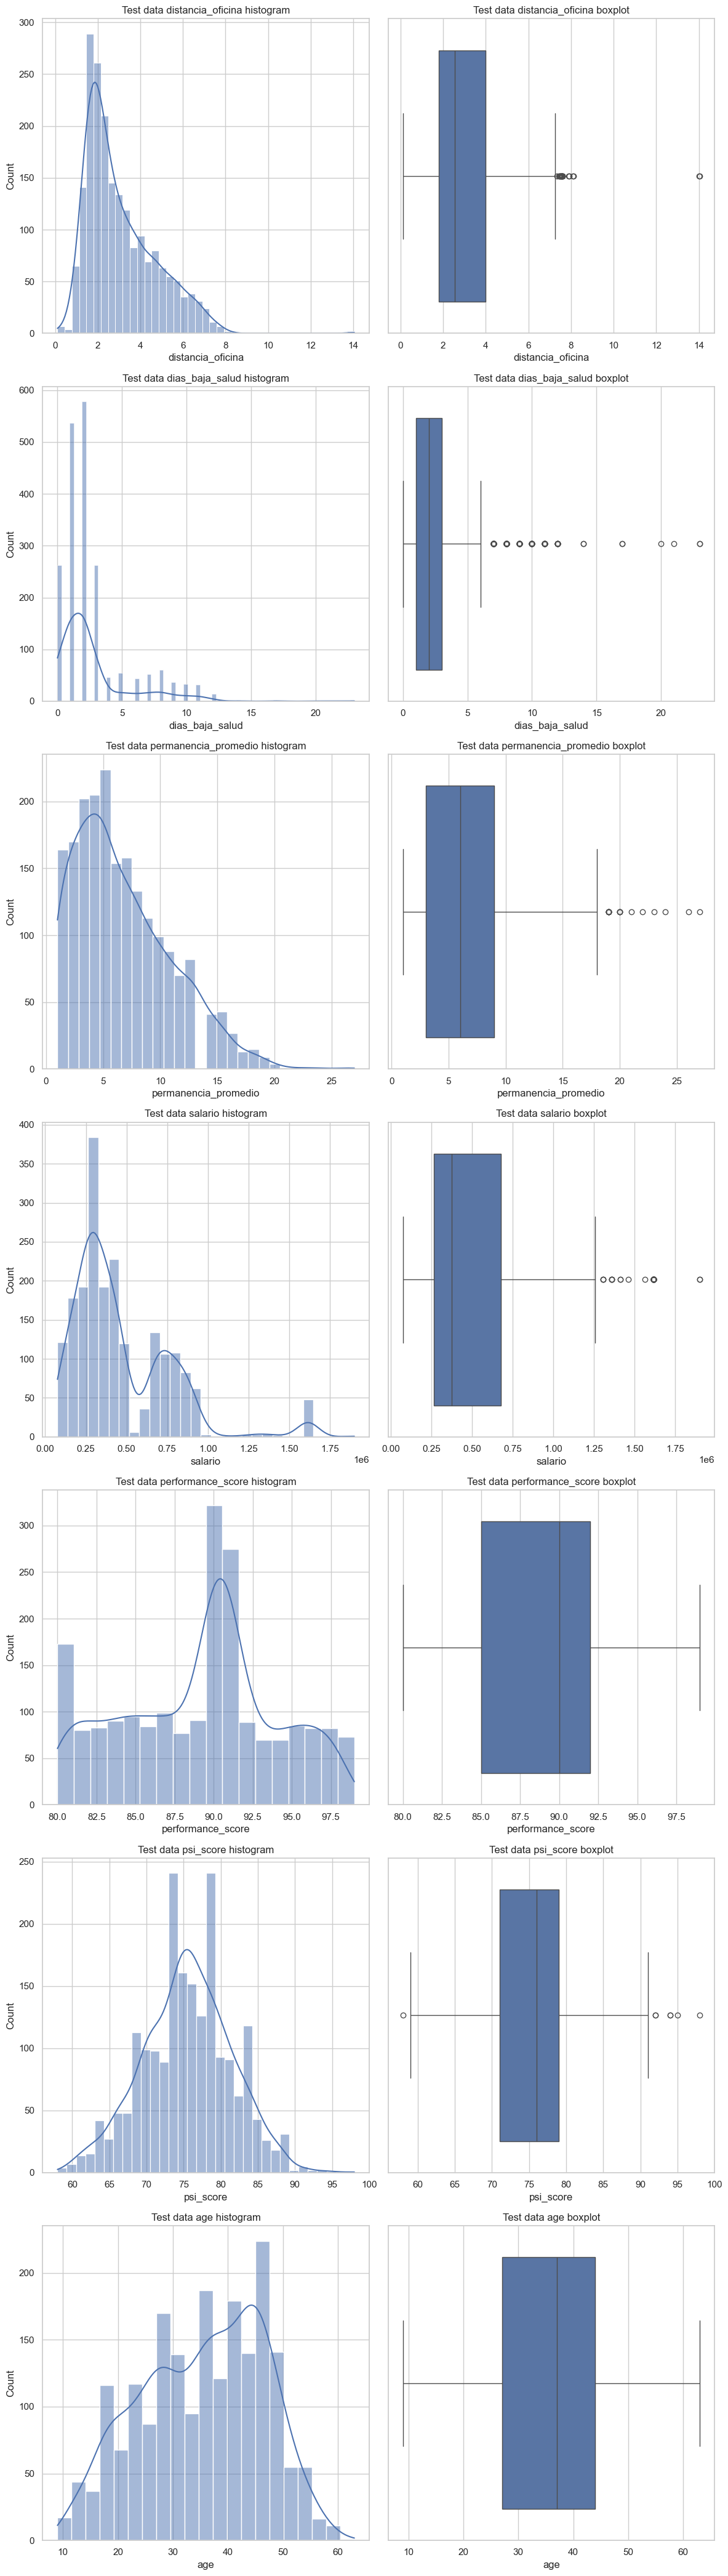

In [ ]:
explore_numerical_dist(test_clean_df, num_cols, name_df='Test data')

plt.show()

Analysing distributions for both test and train data, we can see that they are similar.

The outliers are natural variations of the population, for example: In `salario` it is normal a great salary that could be from a CEO or someone who have a lot of people in charged, or in `dias_baja_salud` there are people that were sick for many days.

Additionally, we can see skewed distributions, which lead us to make the analysis using the median.

## Bivariate analysis

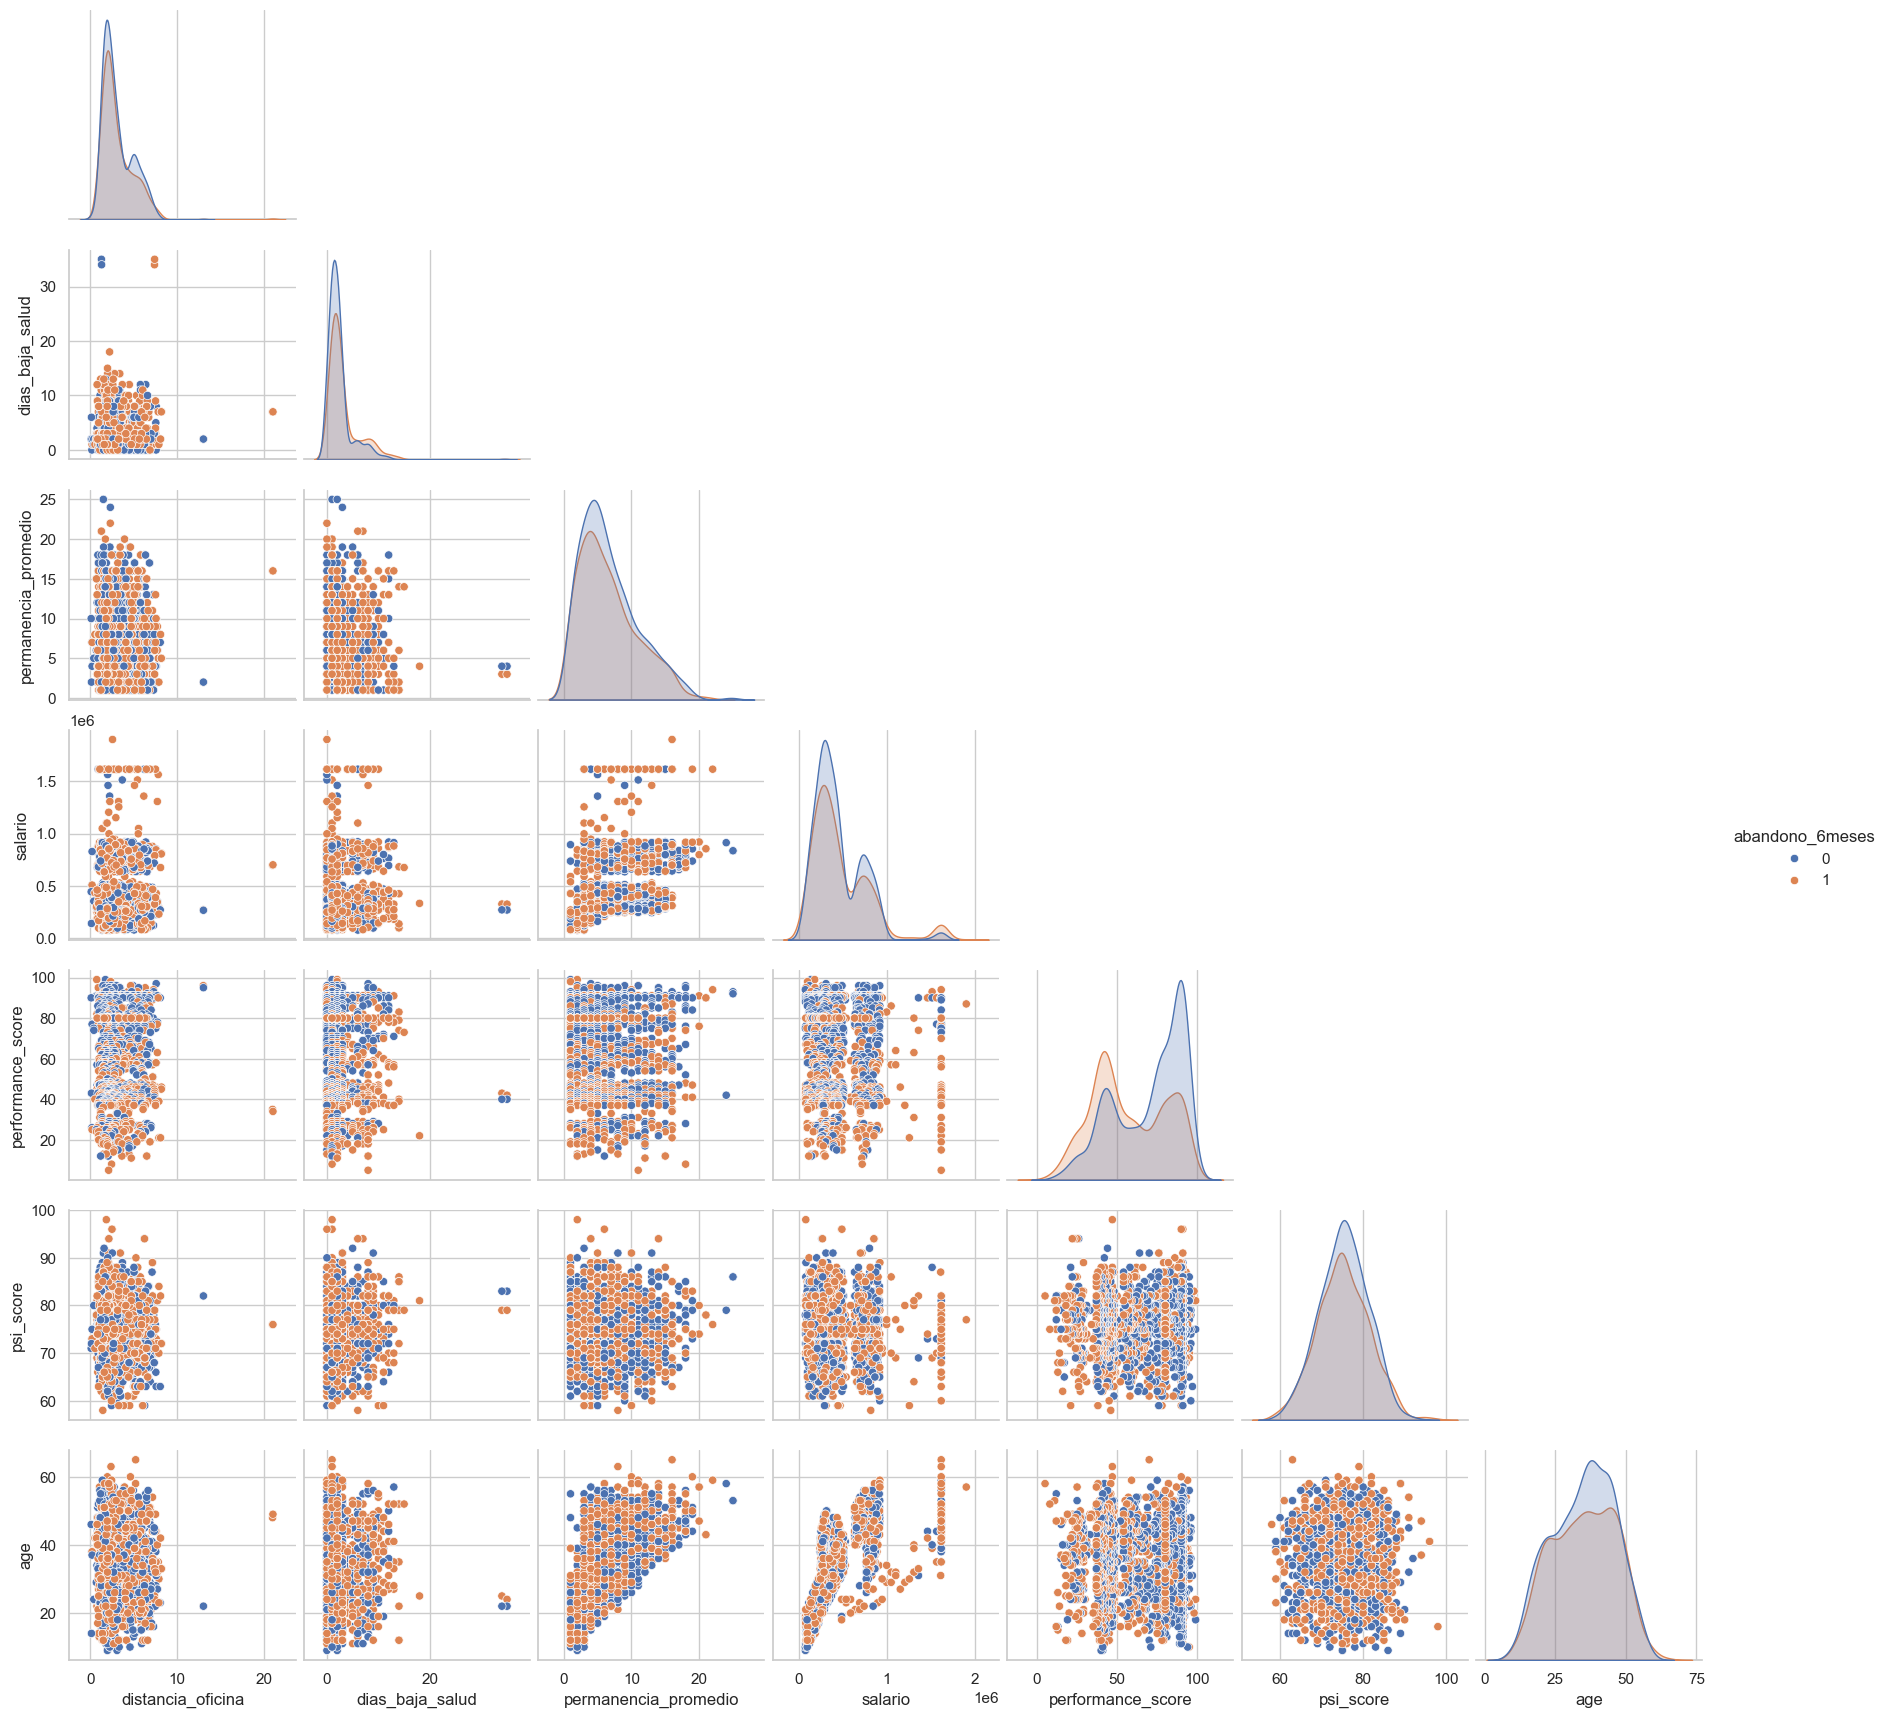

In [ ]:
sns.pairplot(data=train_clean_df.drop('id_colaborador', axis=1), hue='abandono_6meses', corner=True)

plt.show()

In general, there are no observable relationships between the variables and the resing, and distributions are similar.

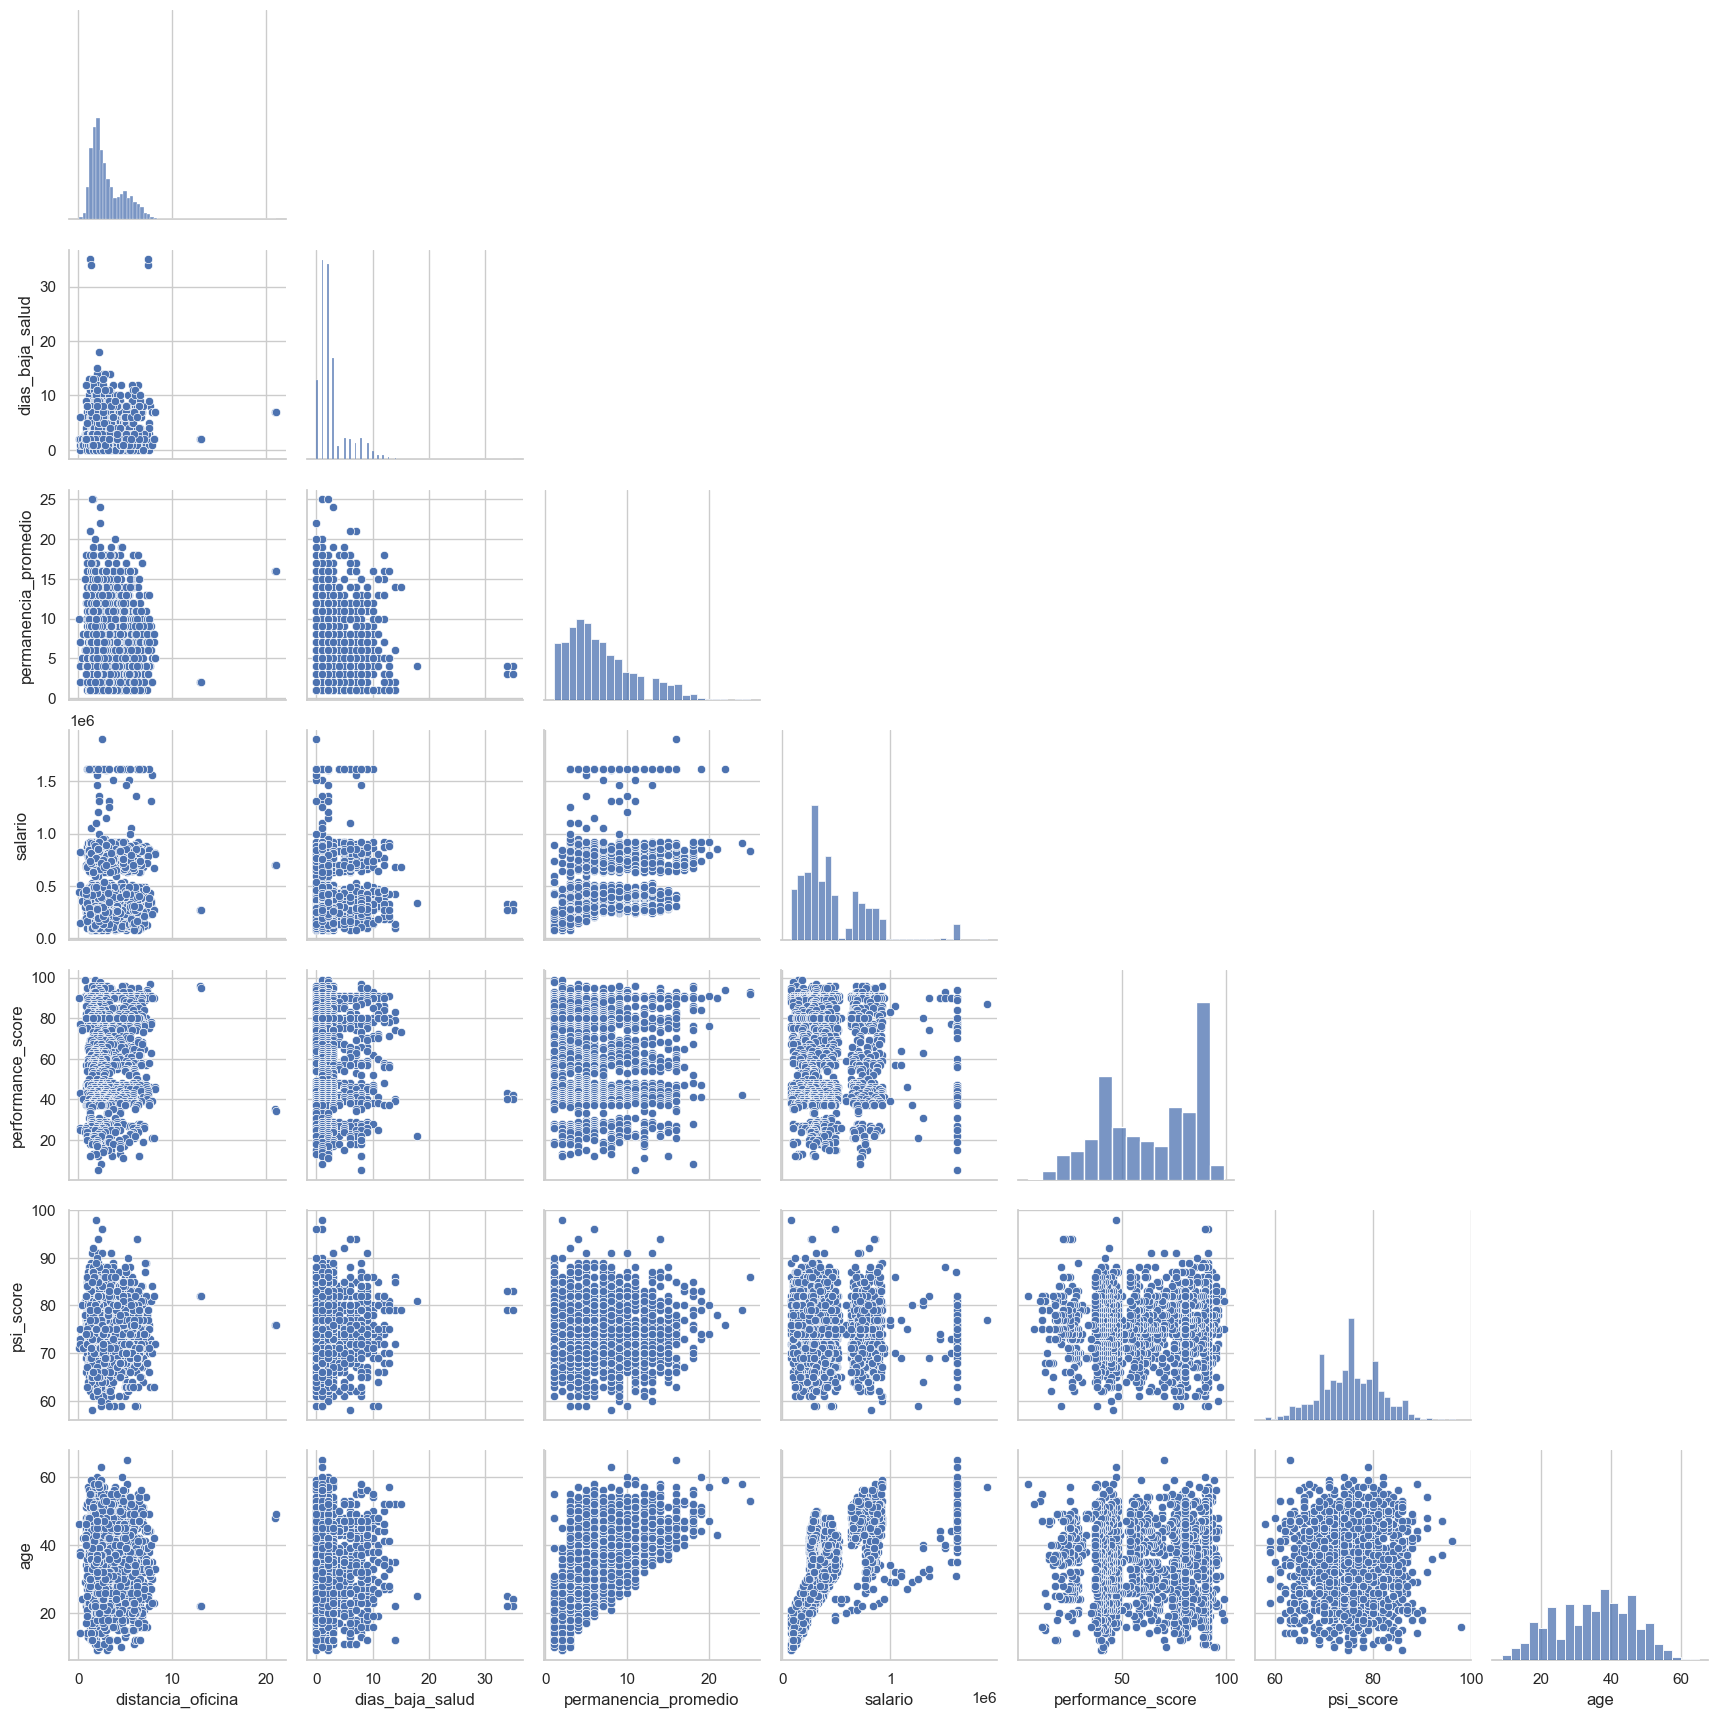

In [ ]:
sns.pairplot(data=train_clean_df.drop('id_colaborador', axis=1), corner=True)

plt.show()

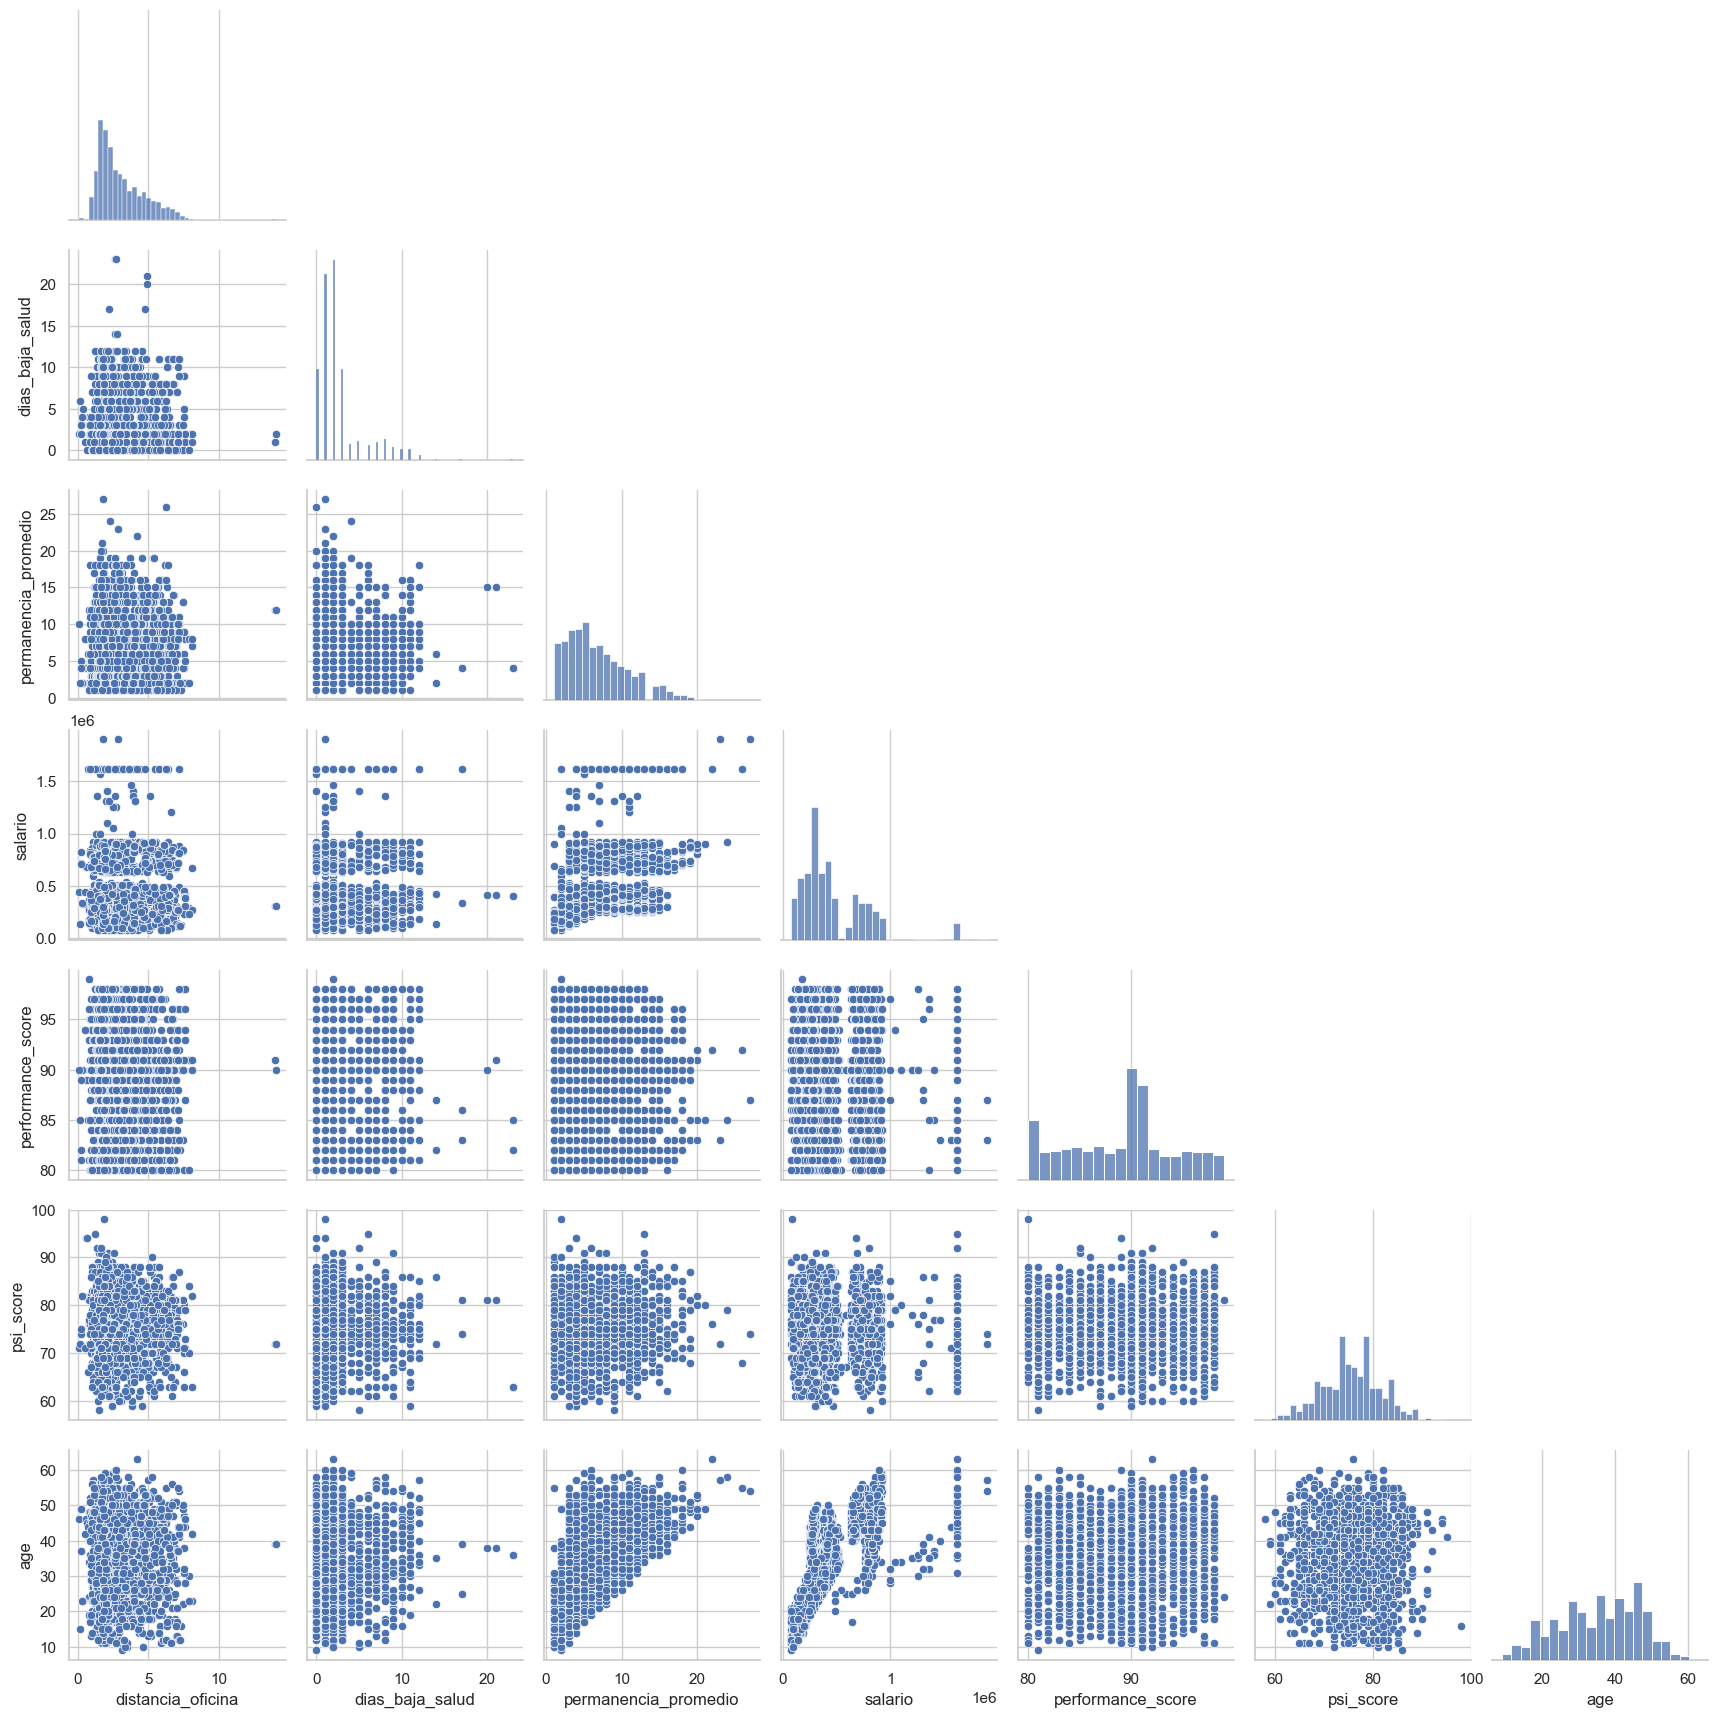

In [ ]:
sns.pairplot(data=test_clean_df.drop('id_colaborador', axis=1), corner=True)

plt.show()

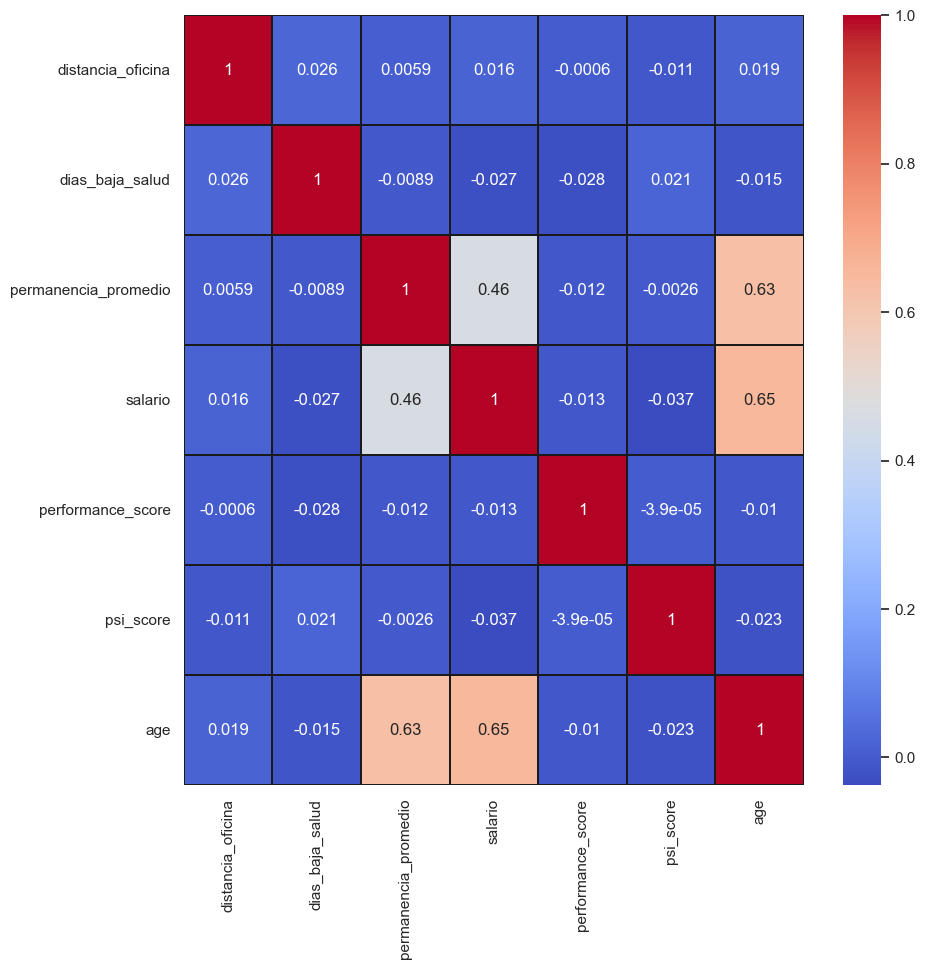

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=train_clean_df[num_cols].corr(), cmap='coolwarm', linecolor='k', linewidths=0.1, annot=True)
plt.show()

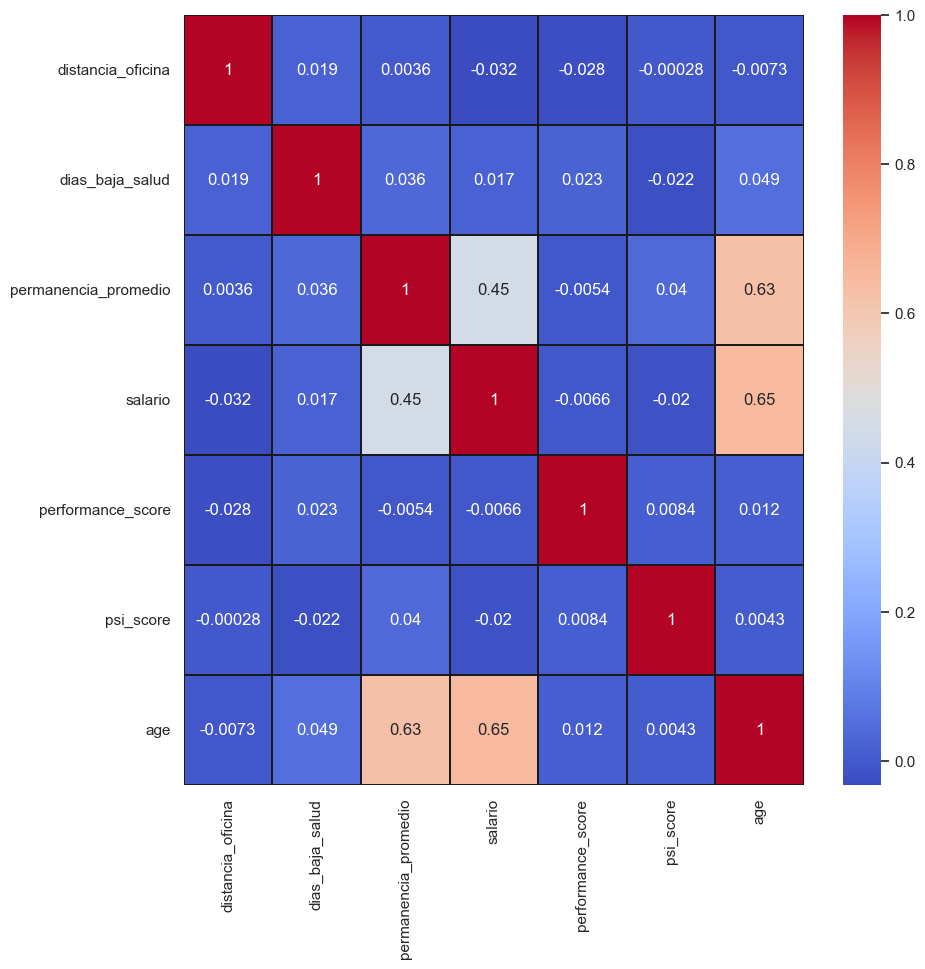

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=test_clean_df[num_cols].corr(), cmap='coolwarm', linecolor='k', linewidths=0.1, annot=True)
plt.show()

There is a moderate positive relationship between salario-permanencia_promedio, and a high correlation between age-permanencia_promedio and age-salario.

In [ ]:
# Checking median of the numerical columns between the people who resign and who don't

train_clean_df.groupby('abandono_6meses')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
abandono_6meses                                                             
0                            2.505              2.0                   6.0   
1                            2.510              2.0                   6.0   

                  salario  performance_score  psi_score   age  
abandono_6meses                                                
0                373470.0               77.0       75.0  36.0  
1                373293.0               54.0       75.0  36.0

Signifficant differences only on performance_score

In [ ]:
# Checking median of the numerical columns between the people who resign and who don't

train_clean_df.groupby('abandono_6meses')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
abandono_6meses                                                             
0                         3.112515         2.328982              6.703220   
1                         3.110912         3.144566              6.578265   

                       salario  performance_score  psi_score        age  
abandono_6meses                                                          
0                441639.556136          69.926023  75.339426  34.906005  
1                474641.733799          57.199402  75.225324  35.067797

Signifficant differences on dias_baja_salud and performance_score. All the columns will be tested with hypothesis testing

### Seniority

In [ ]:
train_clean_df.groupby('seniority')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
seniority                                                             
1                       2.51              2.0                   6.0   
2                       2.51              1.0                   7.0   

             salario  performance_score  psi_score   age  
seniority                                                 
1           352331.0               67.0       75.0  36.0  
2          1616000.0               60.0       74.0  41.0

In [ ]:
test_clean_df.groupby('seniority')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
seniority                                                             
1                       2.55              2.0                   6.0   
2                       2.27              1.0                   6.0   

             salario  performance_score  psi_score   age  
seniority                                                 
1           366459.0               90.0       76.0  36.0  
2          1616000.0               90.0       76.0  42.0

In [ ]:
train_clean_df.groupby('seniority')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
seniority                                                             
1                   3.110750         2.746240              6.581756   
2                   3.134835         1.868132              8.076923   

                salario  performance_score  psi_score        age  
seniority                                                         
1          4.185099e+05          64.106259  75.343037  34.770985  
2          1.329237e+06          61.461538  74.000000  39.747253

In [ ]:
test_clean_df.groupby('seniority')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
seniority                                                             
1                   3.063751         2.678369              6.641714   
2                   2.957711         2.289157              8.385542   

                salario  performance_score  psi_score        age  
seniority                                                         
1          4.244259e+05          89.146102  75.461022  35.104285  
2          1.383262e+06          89.144578  75.072289  40.975904

Employees with seniority 2 tends to be less sick, stays more and gain more. Also they are older.

### modalidad_trabajo

In [ ]:
train_clean_df.groupby('modalidad_trabajo')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
modalidad_trabajo                                                             
Híbrida                        2.605              2.0                   6.0   
Presencial                     2.495              2.0                   6.0   

                    salario  performance_score  psi_score   age  
modalidad_trabajo                                                
Híbrida            349474.5               67.0       74.0  36.0  
Presencial         387023.0               67.0       75.0  36.0

In [ ]:
test_clean_df.groupby('modalidad_trabajo')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
modalidad_trabajo                                                             
Híbrida                       2.6350              2.0                   6.0   
Presencial                    2.5075              2.0                   6.0   

                    salario  performance_score  psi_score   age  
modalidad_trabajo                                                
Híbrida            347943.5               90.0       75.0  35.0  
Presencial         388482.5               90.0       76.0  37.0

In [ ]:
train_clean_df.groupby('modalidad_trabajo')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
modalidad_trabajo                                                             
Híbrida                     3.128513         2.627010              6.673633   
Presencial                  3.104961         2.742484              6.633333   

                         salario  performance_score  psi_score        age  
modalidad_trabajo                                                          
Híbrida            428094.657556          64.598071  75.004823  34.903537  
Presencial         468780.805229          63.749020  75.400654  35.013072

In [ ]:
test_clean_df.groupby('modalidad_trabajo')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
modalidad_trabajo                                                             
Híbrida                     3.022810         2.820261              6.495098   
Presencial                  3.075295         2.593750              6.808239   

                         salario  performance_score  psi_score        age  
modalidad_trabajo                                                          
Híbrida            418677.419935          88.942810  75.223856  34.379085  
Presencial         483446.749290          89.234375  75.541193  35.765625

People who works presencial tends to be less sick and gain more.

### genero

In [ ]:
train_clean_df.groupby('genero')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio   salario  \
genero                                                                       
Hombre              2.565              2.0                   6.0  371700.0   
Mujer               2.490              2.0                   6.0  385124.0   

        performance_score  psi_score   age  
genero                                      
Hombre               68.0       75.0  36.0  
Mujer                67.0       75.0  35.0

In [ ]:
test_clean_df.groupby('genero')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio   salario  \
genero                                                                       
Hombre              2.610              2.0                   6.0  376876.0   
Mujer               2.525              2.0                   6.0  373245.0   

        performance_score  psi_score   age  
genero                                      
Hombre               90.0       75.0  37.0  
Mujer                90.0       76.0  36.0

In [ ]:
train_clean_df.groupby('genero')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
genero                                                             
Hombre           3.164521         2.727854              6.721461   
Mujer            3.057119         2.689688              6.565752   

              salario  performance_score  psi_score        age  
genero                                                          
Hombre  466429.707763          64.167123  75.370776  35.395434  
Mujer   447274.341533          63.815516  75.198675  34.552507

In [ ]:
test_clean_df.groupby('genero')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
genero                                                             
Hombre           3.066272         2.720244              6.747711   
Mujer            3.052874         2.607522              6.680810   

              salario  performance_score  psi_score        age  
genero                                                          
Hombre  470511.134283          89.253306  75.420142  35.762970  
Mujer   457484.242044          89.044359  75.468660  34.949855

Women gain less than men.

### canal_reclutamiento

In [ ]:
train_clean_df.groupby('canal_reclutamiento')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
canal_reclutamiento                                                             
Ferias & Networking             2.8250              2.0                   6.0   
Headhunter                      2.2900              0.5                   4.0   
Linkedin                        2.5425              2.0                   5.0   
Portal Web                      2.5000              2.0                   6.0   
Referidos                       2.3425              2.0                   6.0   

                      salario  performance_score  psi_score   age  
canal_reclutamiento                                                
Ferias & Networking  389386.5               63.5       75.0  36.0  
Headhunter           340996.5               75.0       75.0  30.5  
Linkedin             372200.0               70.0       76.0  35.0  
Portal Web           373086.0               65.0       75.0  36.0  
Referidos            367115.5               67.0       75.5  35.0

In [ ]:
test_clean_df.groupby('canal_reclutamiento')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
canal_reclutamiento                                                             
Ferias & Networking             2.9350              1.0                   5.0   
Headhunter                      2.1350              1.0                   4.0   
Linkedin                        2.5775              2.0                   6.0   
Portal Web                      2.4900              2.0                   6.0   
Referidos                       2.4300              2.0                   6.0   

                      salario  performance_score  psi_score   age  
canal_reclutamiento                                                
Ferias & Networking  350435.0               90.0       75.0  35.0  
Headhunter           407694.0               89.0       76.0  36.0  
Linkedin             377076.5               90.0       76.0  37.0  
Portal Web           381081.0               90.0       75.0  37.0  
Referidos            374225.0               90.0       76.0  36.0

In [ ]:
train_clean_df.groupby('canal_reclutamiento')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
canal_reclutamiento                                                             
Ferias & Networking           3.383912         1.597403              6.977273   
Headhunter                    2.703125         3.312500              5.531250   
Linkedin                      3.165523         3.368852              6.497951   
Portal Web                    3.085137         3.046653              6.702840   
Referidos                     2.902544         1.727811              6.491124   

                           salario  performance_score  psi_score        age  
canal_reclutamiento                                                          
Ferias & Networking  468197.678571          63.477273  74.620130  35.500000  
Headhunter           424875.218750          67.593750  75.000000  32.375000  
Linkedin             451387.389344          65.596311  76.061475  34.387295  
Portal Web           462323.073022          62.992901  75.045639  35.277890  
Referidos            442547.399408          64.733728  75.502959  34.748521

In [ ]:
test_clean_df.groupby('canal_reclutamiento')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
canal_reclutamiento                                                             
Ferias & Networking           3.331268         1.489437              6.302817   
Headhunter                    2.535556         3.037037              5.444444   
Linkedin                      3.147069         3.396078              6.558824   
Portal Web                    3.013711         2.965478              6.951669   
Referidos                     2.853076         1.709091              6.781818   

                           salario  performance_score  psi_score        age  
canal_reclutamiento                                                          
Ferias & Networking  420736.045775          89.285211  74.943662  33.676056  
Headhunter           513256.370370          88.962963  76.222222  34.888889  
Linkedin             472247.913725          89.372549  75.798039  35.843137  
Portal Web           473131.779056          89.009206  75.283084  35.643268  
Referidos            459329.372727          89.051515  75.693939  35.266667

Employees recruited in ferias & networking and refered tend to be less sick

### estado_civil

In [ ]:
train_clean_df.groupby('estado_civil')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
estado_civil                                                             
Casado                     2.70              2.0                   6.0   
Divorciado                 2.38              2.0                   8.0   
Soltero                    2.41              2.0                   5.0   
Viudo                      2.53              2.0                   9.0   

               salario  performance_score  psi_score   age  
estado_civil                                                
Casado        393520.0               64.0       75.0  36.0  
Divorciado    638196.5               67.5       76.0  44.0  
Soltero       286836.0               70.0       75.0  30.0  
Viudo         697616.0               76.0       76.0  46.0

In [ ]:
test_clean_df.groupby('estado_civil')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
estado_civil                                                             
Casado                   2.5725              2.0                   6.0   
Divorciado               2.7750              2.0                   8.0   
Soltero                  2.4475              2.0                   5.0   
Viudo                    2.5850              2.0                   9.0   

               salario  performance_score  psi_score   age  
estado_civil                                                
Casado        386939.5               90.0       76.0  36.0  
Divorciado    633919.0               90.0       75.0  44.0  
Soltero       290320.0               90.0       76.0  29.0  
Viudo         696171.0               90.0       75.0  46.0

In [ ]:
train_clean_df.groupby('estado_civil')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
estado_civil                                                             
Casado                 3.233908         2.767107              6.823529   
Divorciado             3.116014         2.684685              9.018018   
Soltero                3.023108         2.699459              5.403243   
Viudo                  2.991570         2.511628              9.395349   

                    salario  performance_score  psi_score        age  
estado_civil                                                          
Casado        484093.663866          62.923169  75.252101  35.680672  
Divorciado    566727.752252          64.009009  75.396396  42.355856  
Soltero       359352.040000          64.258378  75.188108  30.527568  
Viudo         709565.633721          67.744186  75.837209  46.029070

In [ ]:
test_clean_df.groupby('estado_civil')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
estado_civil                                                             
Casado                 3.071979         2.600257              6.861183   
Divorciado             3.167689         2.764940              8.501992   
Soltero                3.045000         2.652500              5.403750   
Viudo                  2.926099         2.821990              9.246073   

                    salario  performance_score  psi_score        age  
estado_civil                                                          
Casado        477275.641388          89.109254  75.473008  36.070694  
Divorciado    591682.665339          88.796813  75.015936  41.972112  
Soltero       356456.371250          89.105000  75.446250  30.232500  
Viudo         690710.518325          89.926702  75.890052  45.099476

Divorced and widower employees have a higher salary than married and single employees. Widower employees are also older than divorced, married and single employees in that order.

### join_year

In [ ]:
train_clean_df.groupby('join_year')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio   salario  \
join_year                                                                       
2012                  2.6050              2.0                   6.0  373198.0   
2013                  2.4275              2.0                   5.0  377880.0   
2014                  2.3150              2.0                   6.0  352315.0   
2015                  3.0550              2.0                   6.0  385881.5   
2016                  2.3600              2.0                   4.0  352635.0   
2017                  2.4875              2.0                   6.0  405135.0   
2018                  2.6000              2.0                   5.0  387657.0   
2019                  2.6750              2.0                   6.0  408750.0   
2020                  2.7700              2.0                   5.0  345611.0   
2021                  2.4050              2.0                   6.0  379188.0   
2022                  2.6700              2.0                   7.0  387967.5   
2023                  2.4250              2.0                   5.0  325220.5   

           performance_score  psi_score   age  
join_year                                      
2012                    61.0       76.0  33.0  
2013                    69.0       76.0  33.0  
2014                    70.0       75.0  33.0  
2015                    59.0       75.5  36.5  
2016                    57.0       76.0  31.0  
2017                    66.5       75.0  36.0  
2018                    71.0       75.0  36.0  
2019                    69.5       76.0  38.0  
2020                    70.0       75.0  35.0  
2021                    60.0       75.0  40.0  
2022                    62.5       75.0  41.0  
2023                    80.0       74.0  39.5

In [ ]:
test_clean_df.groupby('join_year')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio   salario  \
join_year                                                                       
2012                  2.9000              2.0                   6.0  328895.0   
2013                  2.7150              2.0                   7.0  393514.0   
2014                  2.6950              2.0                   5.0  351175.0   
2015                  2.2600              2.0                   5.5  392067.5   
2016                  2.4850              2.0                   5.0  373022.0   
2017                  2.3900              2.0                   5.0  391073.0   
2018                  2.6200              2.0                   6.0  364626.0   
2019                  2.4850              2.0                   6.0  386897.5   
2020                  2.6375              2.0                   6.0  373312.0   
2021                  2.5450              2.0                   5.0  386323.0   
2022                  2.4900              2.0                   6.0  370173.0   
2023                  2.8100              2.0                   6.0  384696.0   

           performance_score  psi_score   age  
join_year                                      
2012                    90.0       76.0  28.0  
2013                    90.0       76.0  35.0  
2014                    90.0       76.0  30.0  
2015                    90.0       77.0  33.0  
2016                    90.0       76.0  34.0  
2017                    90.0       75.0  35.0  
2018                    90.0       76.0  37.0  
2019                    90.5       75.5  39.5  
2020                    90.0       74.0  38.5  
2021                    90.0       75.0  39.0  
2022                    90.0       75.0  42.0  
2023                    90.0       75.0  40.0

In [ ]:
train_clean_df.groupby('join_year')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
join_year                                                             
2012                3.314605         2.824859              6.937853   
2013                3.160994         2.897727              6.761364   
2014                3.032725         3.015873              6.603175   
2015                3.449019         2.860759              7.158228   
2016                2.710982         2.858896              5.570552   
2017                3.088245         2.648936              6.851064   
2018                3.212758         2.497758              6.417040   
2019                3.048929         2.506494              6.987013   
2020                3.247616         2.152318              5.576159   
2021                2.967642         2.367876              6.647668   
2022                3.178366         2.871287              7.618812   
2023                2.931124         2.971910              6.382022   

                 salario  performance_score  psi_score        age  
join_year                                                          
2012       469397.451977          62.796610  76.180791  30.169492  
2013       458704.232955          64.284091  74.960227  31.181818  
2014       449506.497354          64.169312  75.111111  31.417989  
2015       490086.449367          62.037975  75.594937  34.297468  
2016       409673.214724          59.877301  75.343558  31.582822  
2017       484037.170213          63.260638  74.824468  35.079787  
2018       450034.955157          65.641256  75.847534  34.192825  
2019       504163.915584          64.961039  75.707792  37.954545  
2020       396351.119205          66.827815  75.079470  35.178808  
2021       470773.632124          60.968912  75.202073  39.025907  
2022       444759.663366          64.118812  75.019802  39.811881  
2023       454939.808989          68.831461  74.567416  39.303371

In [ ]:
test_clean_df.groupby('join_year')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
join_year                                                             
2012                3.219349         2.746575              6.760274   
2013                3.249532         2.911330              7.876847   
2014                3.093212         2.290909              6.284848   
2015                2.890609         2.551282              6.391026   
2016                2.865318         2.407643              6.464968   
2017                2.980752         2.483660              6.169935   
2018                2.990608         2.784530              7.182320   
2019                2.905274         2.493151              6.938356   
2020                3.118476         3.243902              6.134146   
2021                3.103912         2.440415              6.367876   
2022                3.083497         2.830601              6.989071   
2023                3.137775         2.676301              6.676301   

                 salario  performance_score  psi_score        age  
join_year                                                          
2012       447408.904110          89.369863  75.363014  29.397260  
2013       489393.458128          88.113300  75.394089  32.546798  
2014       426159.957576          89.072727  75.527273  30.460606  
2015       462357.211538          89.326923  76.461538  32.378205  
2016       459576.694268          89.267516  76.184713  33.726115  
2017       505616.614379          89.366013  75.078431  35.405229  
2018       457181.033149          89.497238  76.165746  35.453039  
2019       486645.308219          89.513699  75.705479  38.075342  
2020       411249.274390          89.402439  74.603659  36.439024  
2021       481883.196891          88.766839  75.709845  38.295337  
2022       433808.076503          89.081967  74.524590  39.961749  
2023       500941.231214          89.341040  74.734104  40.774566

Notable differences on dias_baja_salud, salario, permanencia_promedio and age along the years

### join_month

In [ ]:
test_clean_df.groupby('join_month')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
join_month                                                             
1                      2.4550              2.0                   5.0   
2                      2.7375              2.0                   6.0   
3                      2.2275              2.0                   6.0   
4                      2.8800              2.0                   6.0   
5                      2.4550              2.0                   6.0   
6                      2.7000              2.0                   5.0   
7                      2.1450              2.0                   6.0   
8                      2.6350              2.0                   6.0   
9                      2.7800              2.0                   6.0   
10                     2.7650              2.0                   6.0   
11                     2.4500              2.0                   6.0   
12                     2.3150              2.0                   6.0   

             salario  performance_score  psi_score   age  
join_month                                                
1           388285.0               90.0       75.0  37.0  
2           391557.0               90.0       75.5  38.0  
3           368088.5               90.0       75.0  32.0  
4           384696.0               90.0       75.0  38.0  
5           392079.0               90.0       75.0  36.0  
6           347243.0               90.0       76.0  35.0  
7           333545.0               90.0       76.0  37.0  
8           318012.5               90.0       76.0  37.0  
9           415486.0               90.0       76.0  37.0  
10          378845.0               90.0       75.0  38.0  
11          384166.0               90.0       76.0  37.0  
12          369697.0               90.0       76.0  35.0

In [ ]:
test_clean_df.groupby('join_month')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
join_month                                                             
1                      2.4550              2.0                   5.0   
2                      2.7375              2.0                   6.0   
3                      2.2275              2.0                   6.0   
4                      2.8800              2.0                   6.0   
5                      2.4550              2.0                   6.0   
6                      2.7000              2.0                   5.0   
7                      2.1450              2.0                   6.0   
8                      2.6350              2.0                   6.0   
9                      2.7800              2.0                   6.0   
10                     2.7650              2.0                   6.0   
11                     2.4500              2.0                   6.0   
12                     2.3150              2.0                   6.0   

             salario  performance_score  psi_score   age  
join_month                                                
1           388285.0               90.0       75.0  37.0  
2           391557.0               90.0       75.5  38.0  
3           368088.5               90.0       75.0  32.0  
4           384696.0               90.0       75.0  38.0  
5           392079.0               90.0       75.0  36.0  
6           347243.0               90.0       76.0  35.0  
7           333545.0               90.0       76.0  37.0  
8           318012.5               90.0       76.0  37.0  
9           415486.0               90.0       76.0  37.0  
10          378845.0               90.0       75.0  38.0  
11          384166.0               90.0       76.0  37.0  
12          369697.0               90.0       76.0  35.0

In [ ]:
train_clean_df.groupby('join_month')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
join_month                                                             
1                    3.332695         3.376623              7.129870   
2                    2.973059         2.473404              7.143617   
3                    2.861429         2.835165              6.879121   
4                    3.578300         2.845000              7.040000   
5                    2.814527         2.552239              6.621891   
6                    3.202371         2.325714              5.982857   
7                    2.898923         2.834254              6.773481   
8                    3.213743         2.790576              6.497382   
9                    3.363968         3.303226              6.238710   
10                   3.164594         2.680203              6.736041   
11                   2.950549         2.134146              6.439024   
12                   3.015366         2.463415              6.121951   

                  salario  performance_score  psi_score        age  
join_month                                                          
1           493969.967532          65.792208  75.103896  36.551948  
2           469126.909574          63.356383  74.781915  34.973404  
3           483270.318681          63.109890  75.186813  35.890110  
4           463294.345000          64.225000  75.905000  36.085000  
5           465665.711443          59.950249  75.422886  34.402985  
6           435021.057143          64.354286  75.360000  33.108571  
7           444283.226519          66.502762  75.458564  35.049724  
8           463558.863874          66.109948  74.486911  34.240838  
9           427724.664516          68.374194  75.064516  35.103226  
10          465353.390863          62.532995  75.010152  35.111675  
11          450112.493902          62.695122  75.756098  34.573171  
12          415581.207317          61.993902  75.957317  34.792683

In [ ]:
test_clean_df.groupby('join_month')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
join_month                                                             
1                    3.054829         2.605714              6.782857   
2                    3.070213         2.902439              6.871951   
3                    2.754096         2.445783              6.234940   
4                    3.344751         2.517413              7.049751   
5                    3.079351         3.058442              6.831169   
6                    3.241257         2.555556              5.970760   
7                    2.697989         2.620112              6.620112   
8                    3.078810         2.916667              6.916667   
9                    3.308030         2.696970              7.036364   
10                   3.220325         2.804734              6.917160   
11                   2.973014         2.411348              6.780142   
12                   2.841198         2.443114              6.520958   

                  salario  performance_score  psi_score        age  
join_month                                                          
1           467703.205714          89.234286  74.794286  35.651429  
2           497719.579268          90.067073  75.835366  35.750000  
3           436708.530120          88.819277  75.433735  33.626506  
4           466421.308458          89.169154  74.766169  35.980100  
5           476262.785714          88.883117  74.935065  35.084416  
6           422398.397661          89.280702  75.836257  33.491228  
7           445702.575419          89.106145  75.530726  34.217877  
8           432294.761905          89.255952  75.541667  36.047619  
9           506724.648485          89.139394  75.290909  37.078788  
10          454515.390533          89.319527  75.372781  35.846154  
11          472920.460993          88.666667  75.666667  36.496454  
12          491735.952096          88.718563  76.491018  35.023952

### performance

In [ ]:
train_clean_df.groupby('performance')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
performance                                                             
high                      2.47              2.0                   6.0   
low                       2.53              2.0                   6.0   

              salario  performance_score  psi_score   age  
performance                                                
high         349037.0               90.0       75.0  36.0  
low          381051.0               47.0       75.0  36.0

In [ ]:
test_clean_df.groupby('performance')[num_cols].median()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
performance                                                             
high                    2.5425              2.0                   6.0   

              salario  performance_score  psi_score   age  
performance                                                
high         374720.0               90.0       76.0  37.0

In [ ]:
train_clean_df.groupby('performance')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
performance                                                             
high                  3.095013         2.653595              6.588235   
low                   3.121009         2.739726              6.676280   

                   salario  performance_score  psi_score        age  
performance                                                          
high         451648.128105          88.347712  75.287582  34.848366  
low          459984.636626          50.562365  75.285508  35.054795

In [ ]:
test_clean_df.groupby('performance')[num_cols].mean()

distancia_oficina  dias_baja_salud  permanencia_promedio  \
performance                                                             
high                  3.059394         2.662376              6.713366   

                   salario  performance_score  psi_score        age  
performance                                                          
high         463823.566337           89.14604   75.44505  35.345545

No great differences between high and low performance employees.